In [144]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plot 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [145]:
data=pd.read_csv("temperatures.csv")
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [146]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [147]:
data.shape

(117, 18)

In [148]:
data.info

<bound method DataFrame.info of      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN

In [149]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


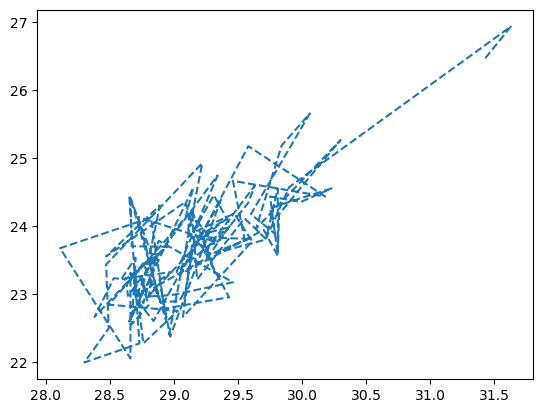

In [150]:
X=data[['ANNUAL']]
y=data['JAN']
plot.plot(X,y,'--')
plot.show()

In [151]:
X

,ANNUAL
0,28.96
1,29.22
2,28.47
3,28.49
4,28.30
...,...
112,29.81
113,29.72
114,29.90
115,31.63


In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

X_train.shape

(87, 1)

In [153]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

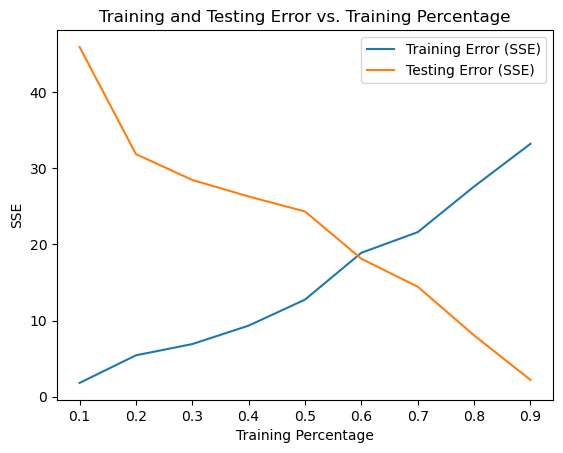

In [154]:
training_percentages = []
for i in range(1, 10):
    percentage = i / 10.0 
    training_percentages.append(percentage)

training_errors = []
testing_errors = []
for percentage in training_percentages:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - percentage, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 
    training_sse = np.sum((y_train - y_train_pred) ** 2)
    testing_sse = np.sum((y_test - y_test_pred) ** 2)
    training_errors.append(training_sse)
    testing_errors.append(testing_sse)

plot.plot(training_percentages, training_errors, label="Training Error (SSE)")
plot.plot(training_percentages, testing_errors, label="Testing Error (SSE)")
plot.xlabel("Training Percentage")
plot.ylabel("SSE")
plot.legend()
plot.title("Training and Testing Error vs. Training Percentage")
plot.show()


In [155]:
data.corr()['ANNUAL'].sort_values()

JUN        0.520189
JUL        0.588454
MAY        0.609015
MAR        0.689205
SEP        0.730756
JAN        0.749880
AUG        0.755384
OCT        0.768170
APR        0.770596
FEB        0.792541
YEAR       0.801129
JUN-SEP    0.810786
NOV        0.812868
DEC        0.843660
JAN-FEB    0.849828
MAR-MAY    0.853277
OCT-DEC    0.897046
ANNUAL     1.000000
Name: ANNUAL, dtype: float64

In [156]:
x1=data[['ANNUAL']]
y1=data['DEC']

In [157]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.10, random_state=0)

In [158]:
model.fit(x1_train,y1_train)

LinearRegression()

In [159]:
predicted=model.predict(x1_test)
y1_train_predicted=model.predict(x1_train)
y1_test_predicted=model.predict(x1_test)

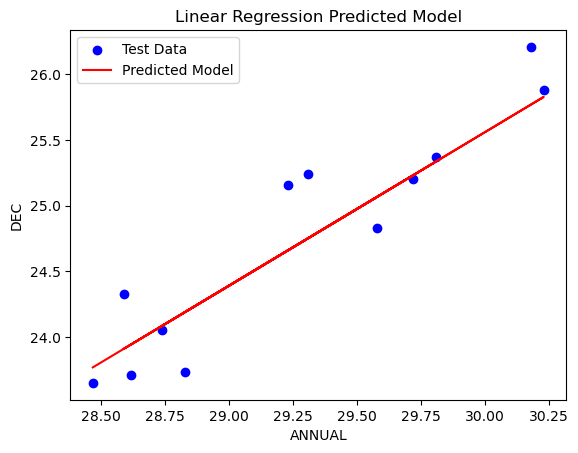

In [160]:
plot.scatter(x1_test, y1_test, color='blue', label='Test Data')
plot.plot(x1_test, y1_test_predicted, color='red', label='Predicted Model')
plot.xlabel('ANNUAL')
plot.ylabel('DEC')
plot.title('Linear Regression Predicted Model')
plot.legend()
plot.show()

In [161]:
#least related 

In [162]:
x=data[['ANNUAL']]
y=data['JUN']

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

In [164]:
model.fit(x_train,y_train)

LinearRegression()

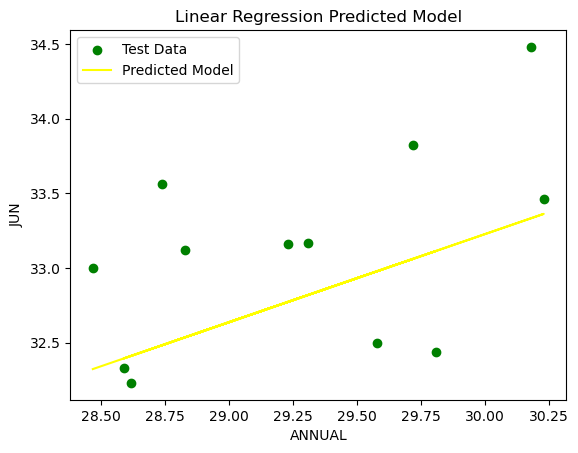

In [165]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)
plot.scatter(x_test, y_test, color='green', label='Test Data')
plot.plot(x_test, y_test_predicted, color='yellow', label='Predicted Model')
plot.xlabel('ANNUAL')
plot.ylabel('JUN')
plot.title('Linear Regression Predicted Model')
plot.legend()
plot.show()

In [166]:
#least corelated mode 
## Training evaluation
print(f"MSE:  {mean_squared_error(y_train_predicted,y_train)}")
print(f"MAE:  {mean_absolute_error(y_train_predicted,y_train)}")
print(f"R-Sqaure :  {r2_score(y_train_predicted,y_train)}")

MSE:  0.2778452702629996
MAE:  0.4270752407518207
R-Sqaure :  -1.6697136427031158


In [167]:
#least corelated mode 
## Testing evaluation

print(f"MSE:  {mean_squared_error(y_test,predicted)}")
print(f"MAE:  {mean_absolute_error(y_test,predicted)}")
print(f"R-Sqaure :  {r2_score(y_test,predicted)}")

MSE:  70.91583057052453
MAE:  8.393916700579373
R-Sqaure :  -171.68844861232952


In [168]:
#highly co related model
## Training evaluation
print(f"MSE:  {mean_squared_error(y1_train_predicted,y1_train)}")
print(f"MAE:  {mean_absolute_error(y1_train_predicted,y1_train)}")
print(f"R-Sqaure :  {r2_score(y1_train_predicted,y1_train)}")

MSE:  0.1837521081098537
MAE:  0.3382033812883906
R-Sqaure :  0.5509671777393979


In [169]:
#highly correlated model
## Testing evaluation
print(f"MSE:  {mean_squared_error(y1_test_predicted,y1_test)}")
print(f"MAE:  {mean_absolute_error(y1_test_predicted,y1_test)}")
print(f"R-Sqaure :  {r2_score(y1_test_predicted,y1_test)}")

MSE:  0.10026713273405051
MAE:  0.25422396570330924
R-Sqaure :  0.7978798153165536


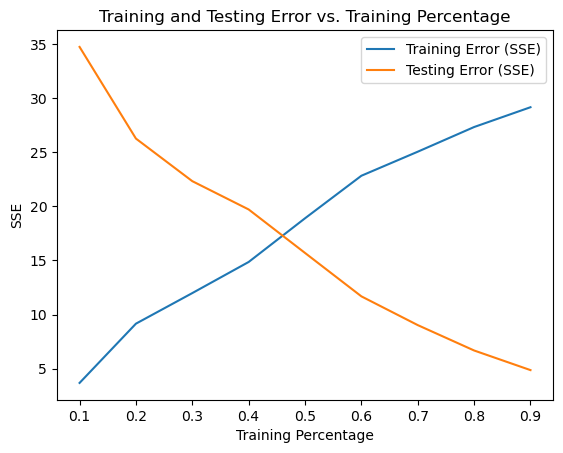

In [170]:
training_percentages = []
for i in range(1, 10):
    percentage = i / 10.0 
    training_percentages.append(percentage)

training_errors = []
testing_errors = []
for percentage in training_percentages:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - percentage, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 
    training_sse = np.sum((y_train - y_train_pred) ** 2)
    testing_sse = np.sum((y_test - y_test_pred) ** 2)
    training_errors.append(training_sse)
    testing_errors.append(testing_sse)

plot.plot(training_percentages, training_errors, label="Training Error (SSE)")
plot.plot(training_percentages, testing_errors, label="Testing Error (SSE)")
plot.xlabel("Training Percentage")
plot.ylabel("SSE")
plot.legend()
plot.title("Training and Testing Error vs. Training Percentage")
plot.show()


In [171]:
print(training_sse)
print(testing_sse)

29.173753377614958
4.859405438315684
